# 2. Exploratory data analysis (EDA)

The present notebook contains an exploratory analysis of the project data. It includes:

1. Importing packages and dataset
2. Exploration of variable correlation
3. Assessment of numeric variables versus target variables
4. Assessment of categorical variables versus target variables

### 2.1. Importing packages and dataset

In [1]:
# Import the required packages

import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

%matplotlib inline

In [2]:
# Import pre-processed dataset and load it into a dataframe

# Create path variable
file = 'C:/Users/javie/OneDrive/Documents/springboard_projects/Capstone-2/data/interim/clean.csv'

# Create dictionary with categorial variables to specify when loading csv in dataframe
cat_dict = {'COOL_TYPE':'category',
            'EQUIP_AGE':'category',
            'HEAT_TYPE':'category',
            'CLIMATE_REGION':'category',
            'OWNERSHIP':'category',
            'UNIT_TYPE':'category',
            'DECADE_BUILT':'category',
            'ATTIC':'category',
            'BEDROOMS':'category',
            'BATHROOMS':'category',
            'STORIES':'category',
            'BASEMENT':'category',
            'HIGH_CEIL':'category',
            'THERMOSTAT':'category',
            'SIZEOFGARAGE':'category'
              }

# Load csv in dataframe
df = pd.read_csv(file, index_col=0, dtype=cat_dict)

In [3]:
# Check # of columns and rows imported
df.shape

(5686, 21)

In [4]:
# Print info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5686 entries, 0 to 5685
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   UNIT_TYPE           5686 non-null   category
 1   CLIMATE_REGION      5686 non-null   category
 2   DECADE_BUILT        5686 non-null   category
 3   FLOOR_AREA_log      5686 non-null   float64 
 4   COOL_TYPE           5686 non-null   category
 5   EQUIP_AGE           5686 non-null   category
 6   HEAT_TYPE           5686 non-null   category
 7   THERMOSTAT          5686 non-null   category
 8   HIGH_CEIL           5686 non-null   category
 9   ATTIC               5686 non-null   category
 10  BASEMENT            5686 non-null   category
 11  BEDROOMS            5555 non-null   category
 12  BATHROOMS           5683 non-null   category
 13  SIZEOFGARAGE        5686 non-null   category
 14  STORIES             5686 non-null   category
 15  OWNERSHIP           5686 non-null   ca

---
### 2.2. Exploration of variable correlation

In this section, we will explore the interaction between floor area (a numeric variable) and the target variables by examinating the correlation matrix and a pairplot.

Log transformed target variables are used for the analysis in lieu of the variables with the original scale.

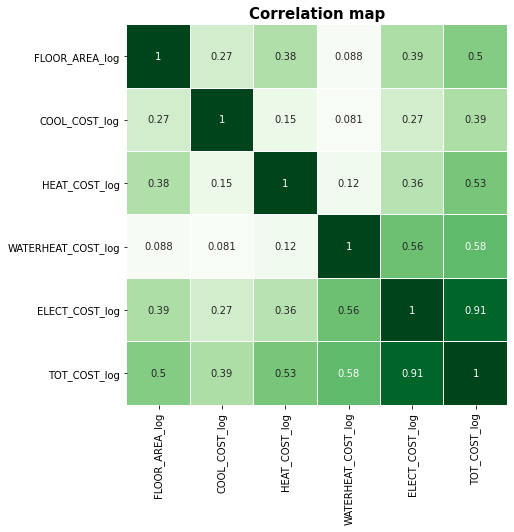

In [5]:
# Create the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix with heatmap
plt.figure(figsize=(7,7))
sns.heatmap(corr_matrix, cmap="Greens", annot=True, cbar=False, square=True, linewidths=.05)
plt.title('Correlation map', weight='bold').set_fontsize('15')
plt.show()

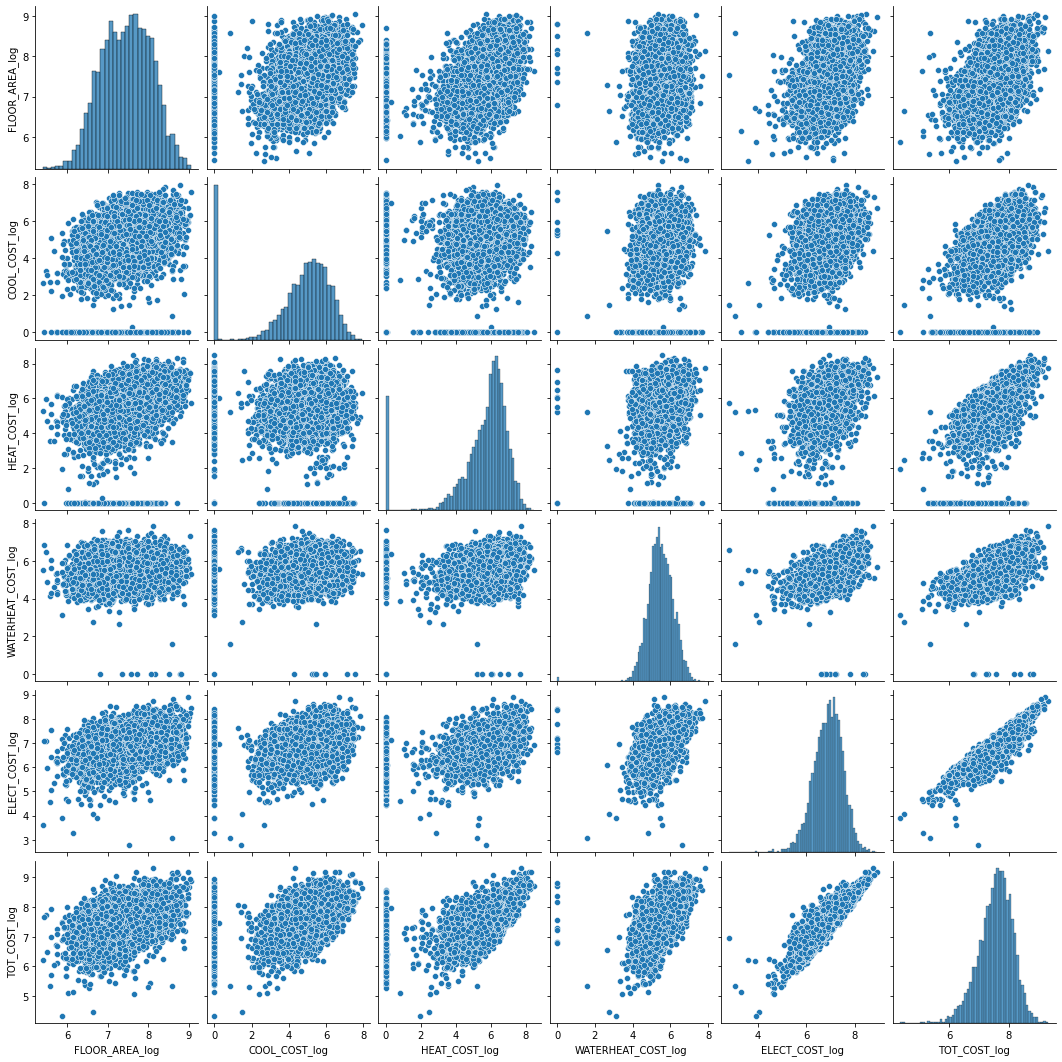

In [6]:
# Visualize a pair plot of numerical variables

sns.pairplot(df)
plt.show()

It can be observed that:

- **Cost for water heating (WATERHEAT_COST_log)** appears uncorrelated with all variables except electricity consumption cost.

- **Total cost for space heating (HEAT_COST_log) and Total electrical consumption (ELECT_COST_log)** have a moderate positive correlation with floor area size.

- **Total electrical consumption (ELECT_COST_log)** is directly correlated to the floor area size.

- **Total cost for space cooling (COOL_COST_log)** has the highest positively correlation with floor area size of all target variables, however still not very markedly.

Correlation coefficients for heating and cooling response variables are expected, since confort temperature in a building is achieved by balancing heating gains and losses through the building envelope with conditioning systems. Thus, it is logic to observe a positive relationship with the unit size.

Water heating cost does not appear correlated with any explanatory variable. This could be explained because water consumption is probably driven by the number of household members and their habits rather than unit size.

In regards to electricity consumption, it seems reasonable to interpret that the largest is the unit, the higher is the electricity consumption. However, other confounding factors are likely to have a significant impact, such as the installed energy intensity (measured by kW per sqrf), luminosity conditions, household habits, etc.

In general, we see that floor area is not particularly correlated with any of the target variables, whose variance appear to be driven by other confounding factors. 

In the next cells, the same correlation matrix is presented but filtered by selected categories: Unit Type, Building Construction Decade, and Climate Regions, to try to identify any confounding variables.

- **Correlation matrix by Unit Type:**

In [7]:
# Visualize unit type values

df.UNIT_TYPE.value_counts()

Detached house                       3752
Apartment in bld \nwith 5+ units      858
Attached house                        479
Apartment in bld \nwith 2-4 units     311
Mobile home                           286
Name: UNIT_TYPE, dtype: int64

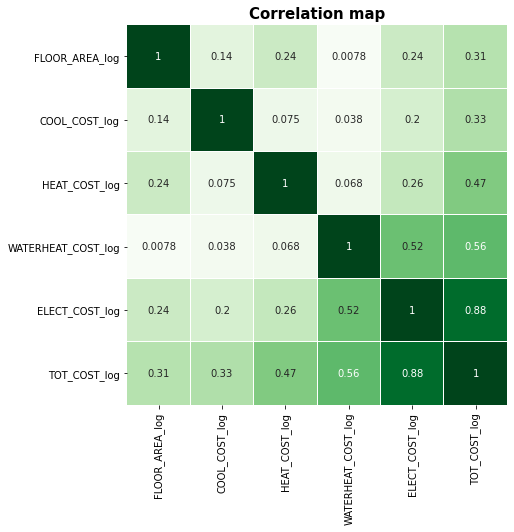

In [8]:
# Select only 'Detached house' type and plot correlation matrix again

df_detached = df[df.UNIT_TYPE == 'Detached house']

corr_matrix = df_detached.corr()

plt.figure(figsize=(7,7))
sns.heatmap(corr_matrix, cmap="Greens", annot=True, cbar=False, square=True, linewidths=.05)
plt.title('Correlation map', weight='bold').set_fontsize('15')
plt.show()

- **Correlation matrix by Decade Built:**

In [9]:
# Visualize year built attribute values and pick the most common

df.DECADE_BUILT.value_counts()

1970-1979    928
2000-2009    901
1980-1989    874
.<1950       858
1990-1999    786
1960-1969    565
1950-1959    544
2010-2015    230
Name: DECADE_BUILT, dtype: int64

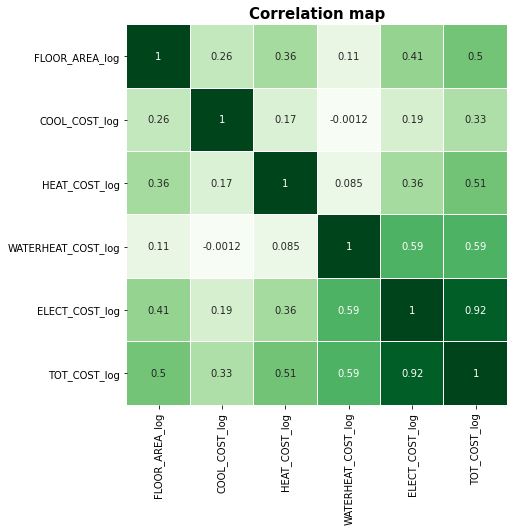

In [10]:
# Select only '1970-1979' decade
df_year = df[df.DECADE_BUILT == '1970-1979']

# Plot correlation matrix again
corr_matrix = df_year.corr()

plt.figure(figsize=(7,7))
sns.heatmap(corr_matrix, cmap="Greens", annot=True, cbar=False, square=True, linewidths=.05)
plt.title('Correlation map', weight='bold').set_fontsize('15')
plt.show()

- **Correlation matrix by Climate Zone:**

In [11]:
# Visualize year built attribute values and pick the most common

df.CLIMATE_REGION.value_counts()

Cold/Very Cold       2008
Mixed-Humid          1468
Hot-Humid            1036
Hot-Dry/Mixed-Dry     750
Marine                424
Name: CLIMATE_REGION, dtype: int64

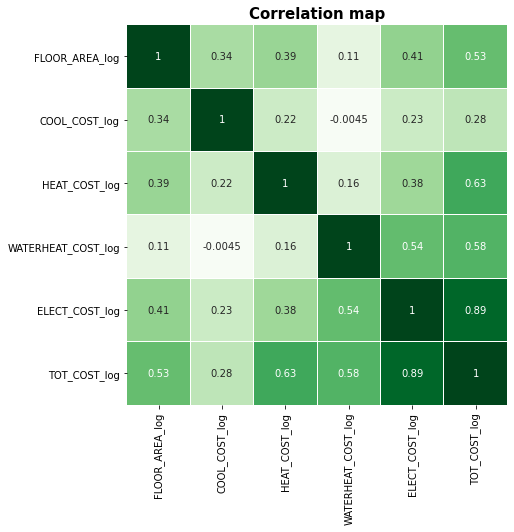

In [12]:
# Select only 'Cold/Very Cold' type
df_clim = df[df.CLIMATE_REGION == 'Cold/Very Cold']

# Plot correlation matrix again
corr_matrix = df_clim.corr()

plt.figure(figsize=(7,7))
sns.heatmap(corr_matrix, cmap="Greens", annot=True, cbar=False, square=True, linewidths=.05)
plt.title('Correlation map', weight='bold').set_fontsize('15')
plt.show()

Interestingly, when filtered by unit types, building age, or climate region, we can see a slight variation in pearson's correlation coefficients but no significant difference. 

Again, none of the target variables have a strong correlation with floor area.

---
### 2.3. Assessment of numeric variables versus target variables

In the next cells, we will dive deeper in these correlations seen above between floor area and target variables. 

Some fuctions are created below to visualize regression lines.

In [13]:
# Define functions to fit regression analysis line

def fit_line_lin(var1, var2):
    '''Creates plot object of linear fit line between two variables'''
    fit_line = np.polyfit(var1, var2, 1)
    return plt.plot(var1, fit_line[0] * var1 + fit_line[1], color='red', linewidth=1)

def fit_line_quad(var1, var2):
    '''Creates plot object of quadratic fit line between two variables'''
    fit_line = np.polyfit(var1, var2, 2)
    return plt.plot(var1, fit_line[0] * var1**2 + fit_line[1] * var1 + fit_line[2], color='green', linewidth=2)

def fit_line_cub(var1, var2):
    '''Creates plot object of cubic fit line between two variables'''
    fit_line = np.polyfit(var1, var2, 3)
    return plt.plot(var1, fit_line[0] * var1**3 + fit_line[1] * var1**2 + fit_line[2] * var1 + fit_line[3], color='magenta', linewidth=2)

- **Electricity consumption cost** by **Floor area** is depicted in the cell below. 

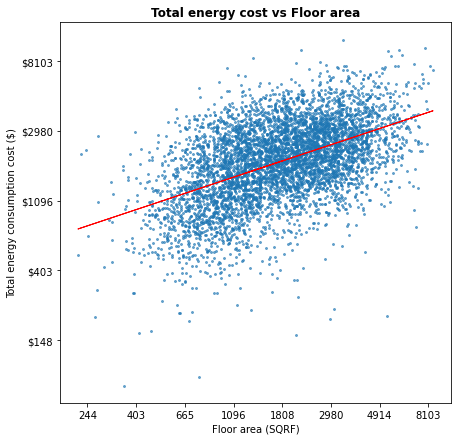

In [14]:
# Create the figure
fig = plt.figure(figsize=(7,7), dpi=72)

# Plot total energy consumption cost vs floor area
ax = plt.subplot()
plt.scatter(x=df['FLOOR_AREA_log'], y=df['TOT_COST_log'], alpha=0.6, s=15, marker='.')
plt.xlabel('Floor area (SQRF)')
plt.ylabel('Total energy consumption cost ($)')
plt.title('Total energy cost vs Floor area', weight='bold').set_fontsize('12')

# Format y and x axis to reproduce legible log scale
formatter = ticker.FuncFormatter(lambda x, pos: '$%d' % (math.exp(x)))
ax.yaxis.set_major_formatter(formatter)
formatter2 = ticker.FuncFormatter(lambda x, pos: '%d' % (math.exp(x)))
ax.xaxis.set_major_formatter(formatter2)

# Plot regression line
fit_line_lin(df['FLOOR_AREA_log'], df['TOT_COST_log'])

plt.show()

We can see a weak positive correlation in which a linear regression line seems to fit reasonably well.

- **Heating cost** by **Floor area**:

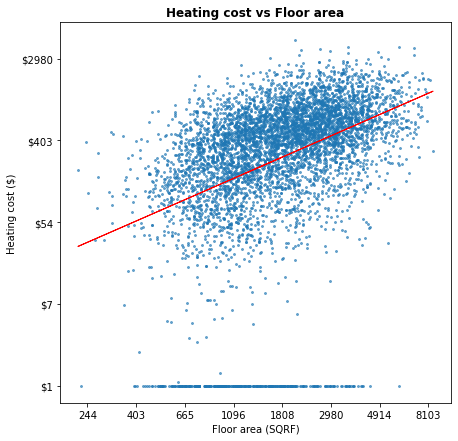

In [15]:
# Create the figure
fig = plt.figure(figsize=(7,7), dpi=72)

# Plot electricity consumption vs floor area
ax = plt.subplot()
plt.scatter(x=df['FLOOR_AREA_log'], y=df['HEAT_COST_log'], alpha=0.6, s=15, marker='.')
plt.xlabel('Floor area (SQRF)')
plt.ylabel('Heating cost ($)')
plt.title('Heating cost vs Floor area', weight='bold').set_fontsize('12')

# Format y and x axis to reproduce legible log scale
formatter = ticker.FuncFormatter(lambda x, pos: '$%d' % (math.exp(x)))
ax.yaxis.set_major_formatter(formatter)
formatter2 = ticker.FuncFormatter(lambda x, pos: '%d' % (math.exp(x)))
ax.xaxis.set_major_formatter(formatter2)

# Plot regression line
fit_line_lin(df['FLOOR_AREA_log'], df['HEAT_COST_log'])

plt.show()

Heating costs and floor area show a weak positive relationship, as already seen in the correlation matrix.

- **Cooling cost** by **Floor area**:

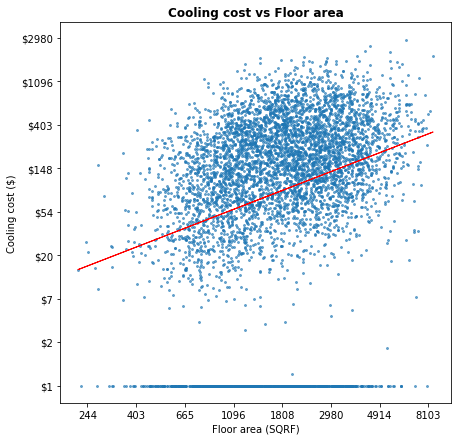

In [16]:
# Create the figure
fig = plt.figure(figsize=(7,7), dpi=72)

# Plot electricity consumption vs floor area
ax = plt.subplot()
plt.scatter(x=df['FLOOR_AREA_log'], y=df['COOL_COST_log'], alpha=0.6, s=15, marker='.')
plt.xlabel('Floor area (SQRF)')
plt.ylabel('Cooling cost ($)')
plt.title('Cooling cost vs Floor area', weight='bold').set_fontsize('12')

# Format y and x axis to reproduce legible log scale
formatter = ticker.FuncFormatter(lambda x, pos: '$%d' % (math.exp(x)))
ax.yaxis.set_major_formatter(formatter)
formatter2 = ticker.FuncFormatter(lambda x, pos: '%d' % (math.exp(x)))
ax.xaxis.set_major_formatter(formatter2)

# Plot regression line
fit_line_lin(df['FLOOR_AREA_log'], df['COOL_COST_log'])

plt.show()

We can observe the same pattern in Cooling Cost plots than in previous graph (Heating cost). However, it seems that data is more disperse in this case in both graphs.

---
### 2.4. Assessment of categorical variables versus target variables

In this section, target variables are plotted against different categorical variables to assess the relationship between them.

- **Energy consumption cost against Unit Type:**

In [17]:
# Set visual style for plots

plt.style.use('seaborn')

In [18]:
# Create a formatter to visualize log scale more intuitively

formatter = ticker.FuncFormatter(lambda x, pos: '$%d' % (math.exp(x)))

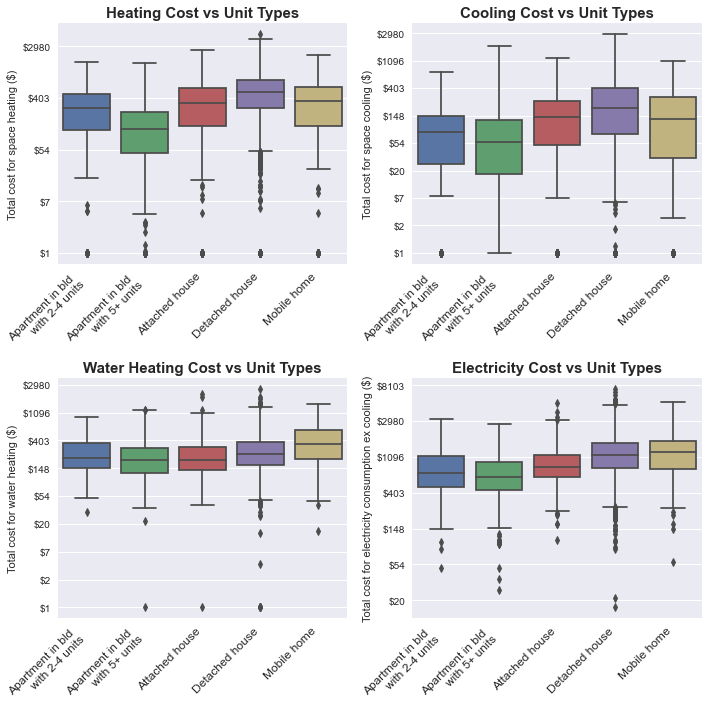

In [19]:
# Create four subplots 

fig = plt.figure(figsize=(10,10), dpi=72)

ax1 = plt.subplot(2,2,1)
sns.boxplot(x='UNIT_TYPE', y='HEAT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=12)
plt.title('Heating Cost vs Unit Types', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space heating ($)')
plt.xlabel('')
ax1.yaxis.set_major_formatter(formatter)

plt.subplot(2,2,2).yaxis.set_major_formatter(formatter)
sns.boxplot(x='UNIT_TYPE', y='COOL_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=12)
plt.title('Cooling Cost vs Unit Types', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space cooling ($)')
plt.xlabel('')

plt.subplot(2,2,3).yaxis.set_major_formatter(formatter)
sns.boxplot(x='UNIT_TYPE', y='WATERHEAT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=12)
plt.title('Water Heating Cost vs Unit Types', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for water heating ($)')
plt.xlabel('')

plt.subplot(2,2,4).yaxis.set_major_formatter(formatter)
sns.boxplot(x='UNIT_TYPE', y='ELECT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=12)
plt.title('Electricity Cost vs Unit Types', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for electricity consumption ex cooling ($)')
plt.xlabel('')

plt.tight_layout()
plt.show()

- Heating and cooling costs are generaly higher in detached houses and lower in multi-unit buildings
- Water consumption cost is higher in mobile homes, this might be due to the source of energy used to heat the water: electricity is less efficient for this purpose.

- **Water heating cost** by **Number of bedrooms** and **Number of bathrooms**:

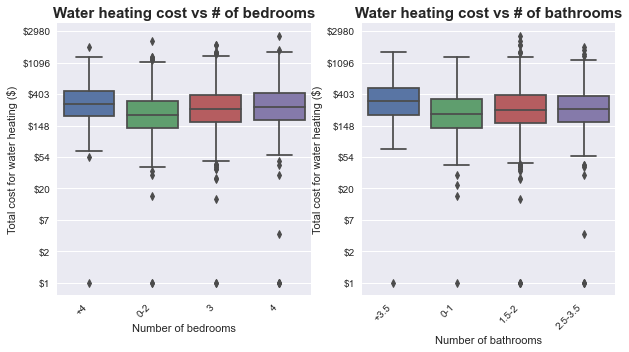

In [20]:
# Create the figure
fig = plt.figure(figsize=(10,5), dpi=72)

# Create four subplots 
plt.subplot(1,2,1).yaxis.set_major_formatter(formatter)
sns.boxplot(x='BEDROOMS', y='WATERHEAT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Water heating cost vs # of bedrooms', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for water heating ($)')
plt.xlabel('Number of bedrooms')

plt.subplot(1,2,2).yaxis.set_major_formatter(formatter)
sns.boxplot(x='BATHROOMS', y='WATERHEAT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Water heating cost vs # of bathrooms', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for water heating ($)')
plt.xlabel('Number of bathrooms')

plt.show()

Water heating costs are harly explained by these two explanatory variables. A linear regression model seems reasonable but cannot explain variations in the data.

- **Energy consumption cost against Climate regions:** 

    Also, a map showing International Energy Conservation Code (IECC) climate regions is displayed as well for reference.

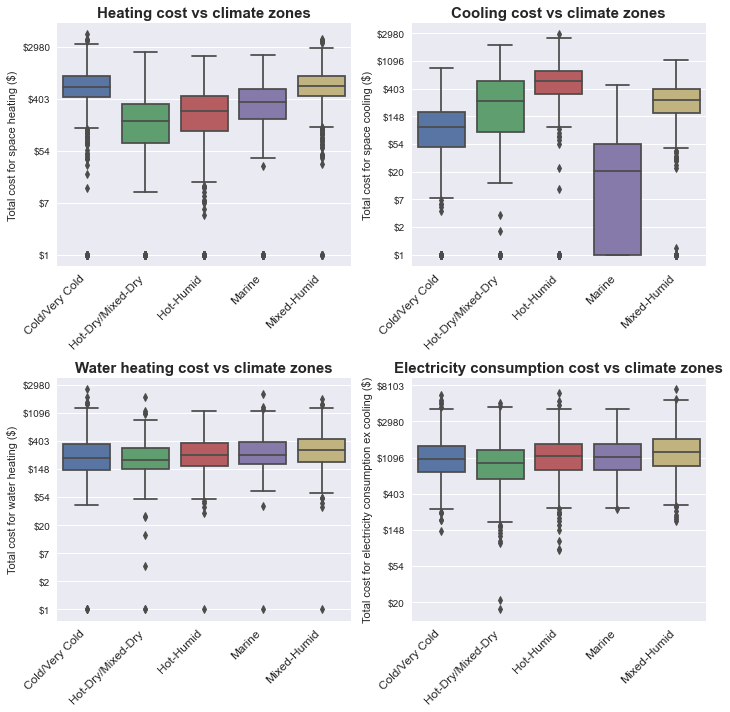

In [21]:
houses = df[df['UNIT_TYPE'].isin(['Attached house', 'Detached house'])] # Filtering by unit types

# Create four subplots 

fig = plt.figure(figsize=(10,10), dpi=72)

plt.subplot(2,2,1).yaxis.set_major_formatter(formatter)
sns.boxplot(x='CLIMATE_REGION', y='HEAT_COST_log', data=houses)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=12)
plt.title('Heating cost vs climate zones', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space heating ($)')
plt.xlabel('')

plt.subplot(2,2,2).yaxis.set_major_formatter(formatter)
sns.boxplot(x='CLIMATE_REGION', y='COOL_COST_log', data=houses)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=12)
plt.title('Cooling cost vs climate zones', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space cooling ($)')
plt.xlabel('')

plt.subplot(2,2,3).yaxis.set_major_formatter(formatter)
sns.boxplot(x='CLIMATE_REGION', y='WATERHEAT_COST_log', data=houses)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=12)
plt.title('Water heating cost vs climate zones', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for water heating ($)')
plt.xlabel('')

plt.subplot(2,2,4).yaxis.set_major_formatter(formatter)
sns.boxplot(x='CLIMATE_REGION', y='ELECT_COST_log', data=houses)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=12)
plt.title('Electricity consumption cost vs climate zones', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for electricity consumption ex cooling ($)')
plt.xlabel('')

plt.tight_layout()
plt.show()

![Title](img/BuildingAmerica_ClimateMap.jpg "Building America climate zone map")

In [22]:
df['CLIMATE_REGION'].value_counts()

Cold/Very Cold       2008
Mixed-Humid          1468
Hot-Humid            1036
Hot-Dry/Mixed-Dry     750
Marine                424
Name: CLIMATE_REGION, dtype: int64

As expected, we can observe large differences in heating and cooling costs by climate conditions. However, there is not a significant difference when it comes to water heating or electricity costs.

- **Consumption costs against Building Construction Decade:** 

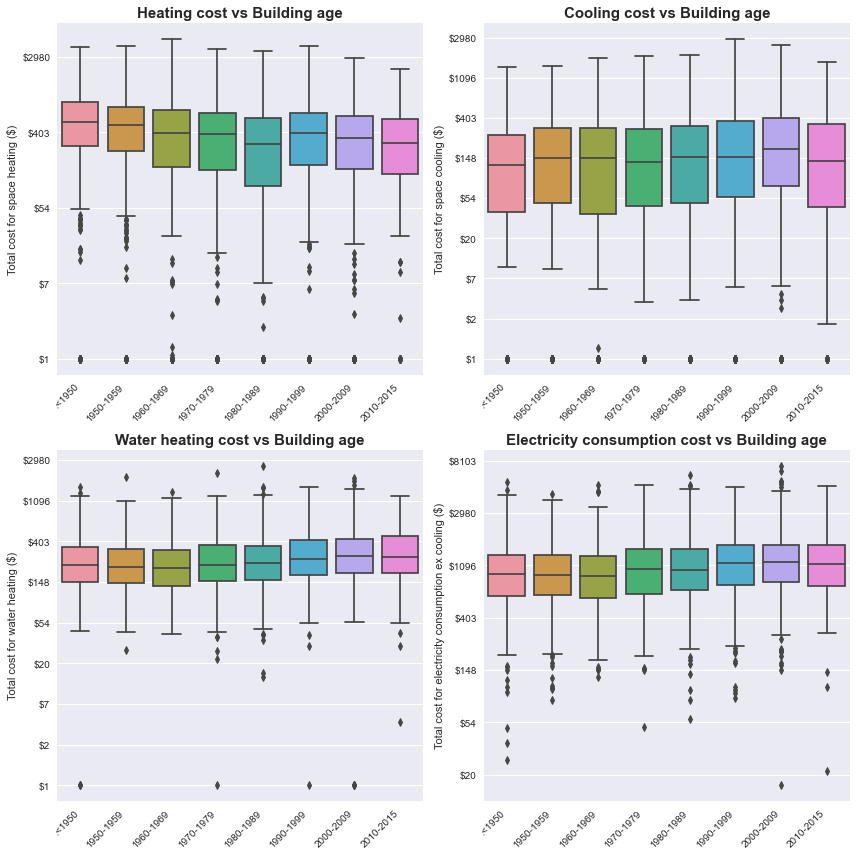

In [23]:
# Create four subplots 

fig = plt.figure(figsize=(12,12), dpi=72)

plt.subplot(2,2,1).yaxis.set_major_formatter(formatter)
sns.boxplot(x='DECADE_BUILT', y='HEAT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Heating cost vs Building age', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space heating ($)')
plt.xlabel('')

plt.subplot(2,2,2).yaxis.set_major_formatter(formatter)
sns.boxplot(x='DECADE_BUILT', y='COOL_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Cooling cost vs Building age', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space cooling ($)')
plt.xlabel('')

plt.subplot(2,2,3).yaxis.set_major_formatter(formatter)
sns.boxplot(x='DECADE_BUILT', y='WATERHEAT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Water heating cost vs Building age', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for water heating ($)')
plt.xlabel('')

plt.subplot(2,2,4).yaxis.set_major_formatter(formatter)
sns.boxplot(x='DECADE_BUILT', y='ELECT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Electricity consumption cost vs Building age', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for electricity consumption ex cooling ($)')
plt.xlabel('')

plt.tight_layout()
plt.show()

It can be seen a slight downward trend in heating cost towards more modern buildings, whereas the opposite is true for cooling, water heating and electricity costs.

This may be explained by the fact that modern homes and buildings are better insulated, but have more energy density. i.e. more  electrical appliances.

- **Heating and cooling cost by equipment age**:

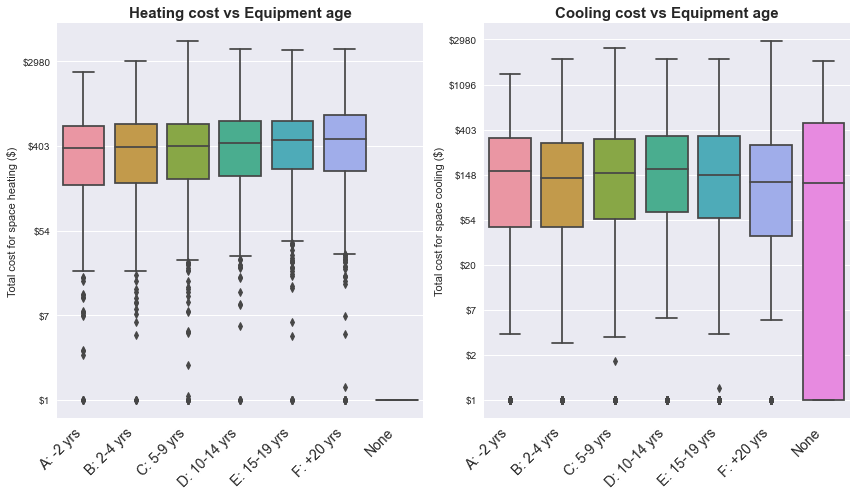

In [24]:
# Creates the figure
fig = plt.figure(figsize=(12,7), dpi=72)

plt.subplot(1,2,1).yaxis.set_major_formatter(formatter)
sns.boxplot(x='EQUIP_AGE', y='HEAT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=14)
plt.title('Heating cost vs Equipment age', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space heating ($)')
plt.xlabel('')

plt.subplot(1,2,2).yaxis.set_major_formatter(formatter)
sns.boxplot(x='EQUIP_AGE', y='COOL_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=14)
plt.title('Cooling cost vs Equipment age', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space cooling ($)')
plt.xlabel('')

plt.tight_layout()
plt.show()

It can be seen that the older is the home system, the higher is the heating cost. However, this is not the same when it comes to cooling costs: they are relative flat or even decreases with equipments older than 20 years.

- **Heating and cooling costs by Equipment type**

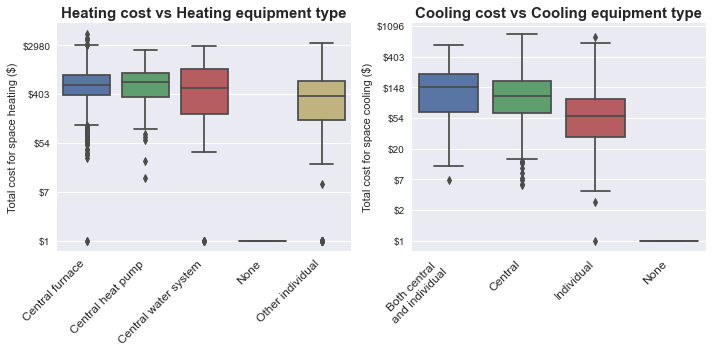

In [25]:
climates = df[df['CLIMATE_REGION'].isin(['Cold/Very Cold', 'Mixed-humid'])] # Filtering by climate zones

# Creates the figure
fig = plt.figure(figsize=(10,5), dpi=72)

plt.subplot(1,2,1).yaxis.set_major_formatter(formatter)
sns.boxplot(x='HEAT_TYPE', y='HEAT_COST_log', data=climates)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=12)
plt.title('Heating cost vs Heating equipment type', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space heating ($)')
plt.xlabel('')


plt.subplot(1,2,2).yaxis.set_major_formatter(formatter)
sns.boxplot(x='COOL_TYPE', y='COOL_COST_log', data=climates)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=12)
plt.title('Cooling cost vs Cooling equipment type', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space cooling ($)')
plt.xlabel('')

plt.tight_layout()
plt.show()

The graph above has been adjusted by climate zones to remove the climate confounding factor. We can observe that:

- Units with central heating systems tend to have generally higher consumption expenses than others with individual systems though the spread of the consumption expenses is larger.
- Cooling cost tend to be higher in units with central systems in contrast to units with individual systems. This could be explained because individual cooling systems have less energy demand and are installed only in the spaces needed, also smaller units (with lower consumption) tend to have less central systems installations.

- **Heating and cooling cost by High ceiling**:

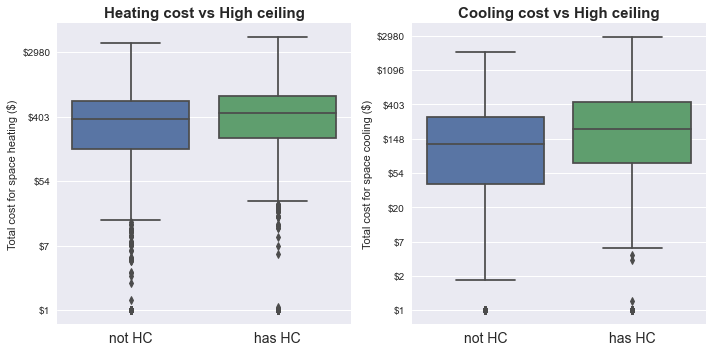

In [26]:
# Creates the figure
fig = plt.figure(figsize=(10,5), dpi=72)

plt.subplot(1,2,1).yaxis.set_major_formatter(formatter)
sns.boxplot(x='HIGH_CEIL', y='HEAT_COST_log', data=df)
plt.xticks([0,1], labels=['not HC', 'has HC'], fontsize=14)
plt.title('Heating cost vs High ceiling', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space heating ($)')
plt.xlabel('')


plt.subplot(1,2,2).yaxis.set_major_formatter(formatter)
sns.boxplot(x='HIGH_CEIL', y='COOL_COST_log', data=df)
plt.xticks([0,1], labels=['not HC', 'has HC'], fontsize=14)
plt.title('Cooling cost vs High ceiling', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space cooling ($)')
plt.xlabel('')

plt.tight_layout()
plt.show()

Units with high ceilings have higher cooling and heating costs than those without. This was expected since a higher ceiling means larger conditioned air volume.

- **Heating and cooling cost by attic and/or basement in unit**:

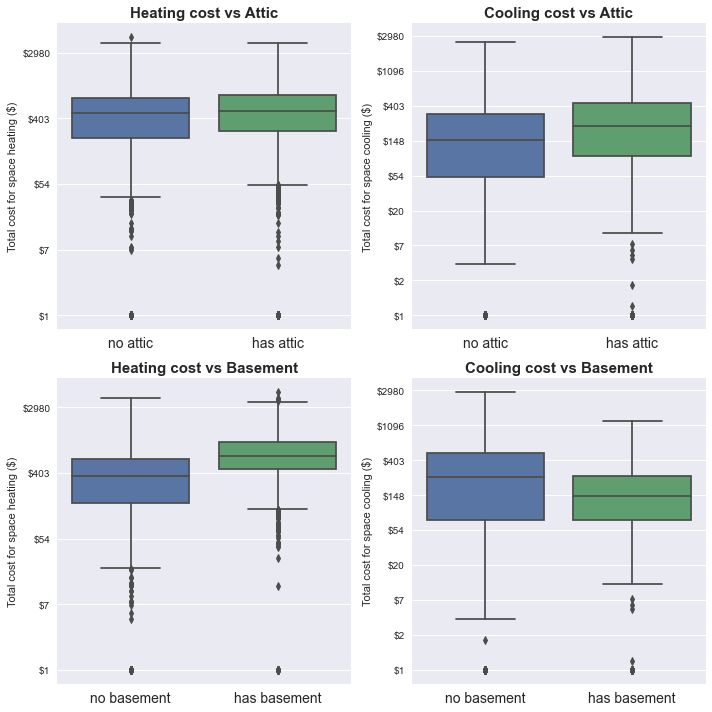

In [27]:
houses = df[df['UNIT_TYPE'].isin(['Attached house', 'Detached house'])] # Filtering by unit types

# Creates the figure
fig = plt.figure(figsize=(10,10), dpi=72)

plt.subplot(2,2,1).yaxis.set_major_formatter(formatter)
sns.boxplot(x='ATTIC', y='HEAT_COST_log', data=houses)
plt.xticks([0,1], labels=['no attic', 'has attic'], fontsize=14)
plt.title('Heating cost vs Attic', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space heating ($)')
plt.xlabel('')

plt.subplot(2,2,2).yaxis.set_major_formatter(formatter)
sns.boxplot(x='ATTIC', y='COOL_COST_log', data=houses)
plt.xticks([0,1], labels=['no attic', 'has attic'], fontsize=14)
plt.title('Cooling cost vs Attic', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space cooling ($)')
plt.xlabel('')

plt.subplot(2,2,3).yaxis.set_major_formatter(formatter)
sns.boxplot(x='BASEMENT', y='HEAT_COST_log', data=houses)
plt.xticks([0,1], labels=['no basement', 'has basement'], fontsize=14)
plt.title('Heating cost vs Basement', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space heating ($)')
plt.xlabel('')

plt.subplot(2,2,4).yaxis.set_major_formatter(formatter)
sns.boxplot(x='BASEMENT', y='COOL_COST_log', data=houses)
plt.xticks([0,1], labels=['no basement', 'has basement'], fontsize=14)
plt.title('Cooling cost vs Basement', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space cooling ($)')
plt.xlabel('')

plt.tight_layout()
plt.show()

We can see that the existence of attic in the unit has a significative positive impact in cooling cost and moderate positive in heating cost. Regarding the units with basement, they have a much higher heating cost and lower cooling cost. This graph has been created after filtering by unit types to remove the confounding factor.

- **Energy consumption costs by unit ownership**:

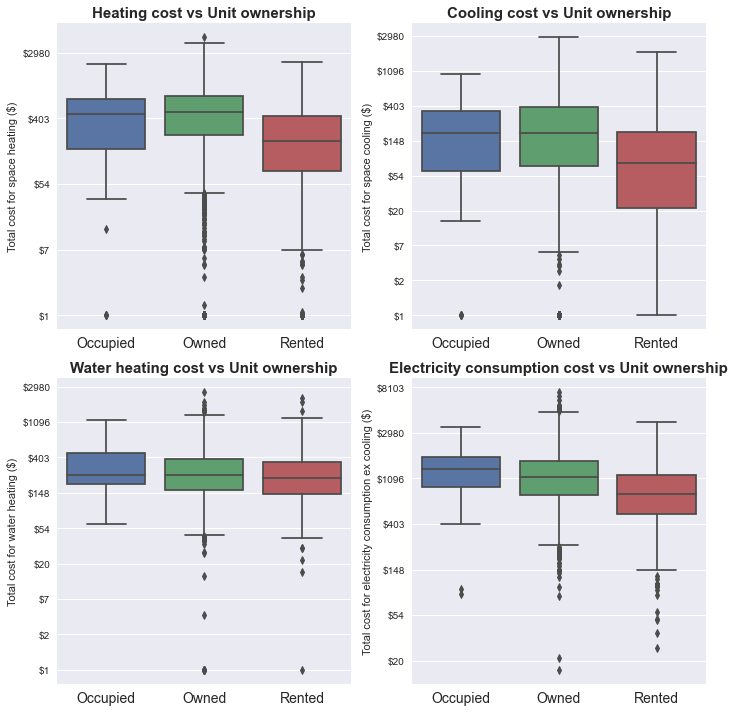

In [28]:
# Create four subplots 

fig = plt.figure(figsize=(10,10), dpi=72)

plt.subplot(2,2,1).yaxis.set_major_formatter(formatter)
sns.boxplot(x='OWNERSHIP', y='HEAT_COST_log', data=df)
plt.xticks(fontsize=14)
plt.title('Heating cost vs Unit ownership', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space heating ($)')
plt.xlabel('')

plt.subplot(2,2,2).yaxis.set_major_formatter(formatter)
sns.boxplot(x='OWNERSHIP', y='COOL_COST_log', data=df)
plt.xticks(fontsize=14)
plt.title('Cooling cost vs Unit ownership', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space cooling ($)')
plt.xlabel('')

plt.subplot(2,2,3).yaxis.set_major_formatter(formatter)
sns.boxplot(x='OWNERSHIP', y='WATERHEAT_COST_log', data=df)
plt.xticks(fontsize=14)
plt.title('Water heating cost vs Unit ownership', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for water heating ($)')
plt.xlabel('')

plt.subplot(2,2,4).yaxis.set_major_formatter(formatter)
sns.boxplot(x='OWNERSHIP', y='ELECT_COST_log', data=df)
plt.xticks(fontsize=14)
plt.title('Electricity consumption cost vs Unit ownership', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for electricity consumption ex cooling ($)')
plt.xlabel('')

plt.tight_layout()
plt.show()

In general, rental units have lower consumption bills than occupied by owner. Probably this is due to co-payments agreement between the lessor and the lessee. Also, this graph above might be reflecting the fact that most rental units are apartments in condos which have lower energy consuption in general.

- **Heating and cooling costs by number of stories**

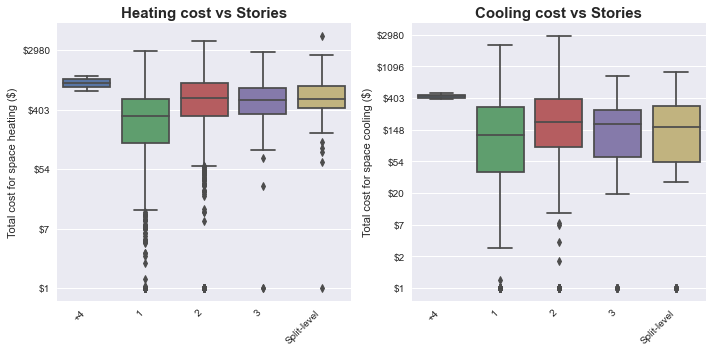

In [29]:
# Creates the figure
fig = plt.figure(figsize=(10,5), dpi=72)

plt.subplot(1,2,1).yaxis.set_major_formatter(formatter)
sns.boxplot(x='STORIES', y='HEAT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Heating cost vs Stories', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space heating ($)')
plt.xlabel('')


plt.subplot(1,2,2).yaxis.set_major_formatter(formatter)
sns.boxplot(x='STORIES', y='COOL_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Cooling cost vs Stories', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space cooling ($)')
plt.xlabel('')

plt.tight_layout()
plt.show()

We can observe at a glance that one story units seems more energy efficient that multi-storie units, wich seems reasonable. There is not a significant difference between 2 and 3 stories. However, we should consider other confounding factors to understand the real effect of multi-story space in heating and cooling, such as Floor Area or Unit Type.

- **Heating and cooling costs by programmable thermostat:** 

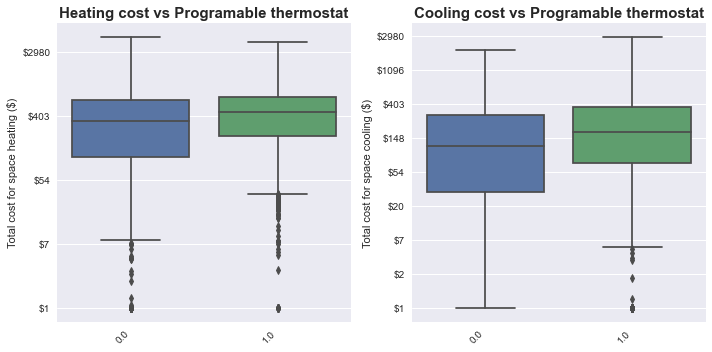

In [30]:
# Creates the figure
fig = plt.figure(figsize=(10,5), dpi=72)

plt.subplot(1,2,1).yaxis.set_major_formatter(formatter)
sns.boxplot(x='THERMOSTAT', y='HEAT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Heating cost vs Programable thermostat', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space heating ($)')
plt.xlabel('')


plt.subplot(1,2,2).yaxis.set_major_formatter(formatter)
sns.boxplot(x='THERMOSTAT', y='COOL_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Cooling cost vs Programable thermostat', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space cooling ($)')
plt.xlabel('')

plt.tight_layout()
plt.show()

Surprisingly, having a programable thermostat is correlated with higher heating and cooling cost. One plausible explanation for this would be the misuse of the thermostat or its incorrect setting. Other explanation could be that only units with high cooling and heating consumption costs are equiped with this control device, and the graph above is simply reflecting this bias.